In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils.plot_points import plot_points
from utils.plot_decision_boundary import plot_decision_boundary

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

# Фиксация случайного seed для воспроизводимости результатов
np.random.seed(0)

# Загрузка и подготовка данных о спаме

In [2]:
# Создание массива данных: [Лотерея, Продажа, Спам (0/1)]
emails = np.array([
    [7,8,1], [3,2,0], [8,4,1], [2,6,0],
    [6,5,1], [9,6,1], [8,5,0], [7,1,0],
    [1,9,1], [4,7,0], [1,3,0], [3,10,1],
    [2,2,1], [9,3,0], [5,3,0], [10,1,0],
    [5,9,1], [10,8,1]
])

# Создание DataFrame с названиями столбцов
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset  # Вывод таблицы данных

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


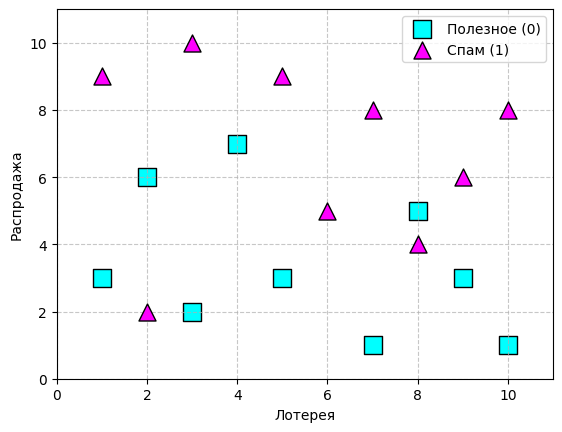

In [3]:
# Разделение на признаки и целевую переменную
features = spam_dataset[['Lottery', 'Sale']]  # Признаки
labels = spam_dataset['Spam']  # Метки (целевая переменная)

# Установим параметры для графиков
figsize = (12, 4)
class_names=('Полезное (0)', 'Спам (1)')
xlabel = 'Лотерея'  # Подпись оси X
ylabel = 'Распродажа'  # Подпись оси Y
xlim=(0, 11)
ylim=(0, 11)

# Визуализация точек данных
plot_points(features, labels, 
            point_size=150,
            class_names=class_names,
            xlabel=xlabel,
            ylabel=ylabel,
            xlim=xlim,
            ylim=ylim)
plt.show()

# Обучение одного дерева решений

In [4]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)  # Создание классификатора
decision_tree_classifier.fit(features, labels)  # Обучение модели

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
print("Accuracy:", decision_tree_classifier.score(features, labels))  # Оценка точности

Accuracy: 1.0


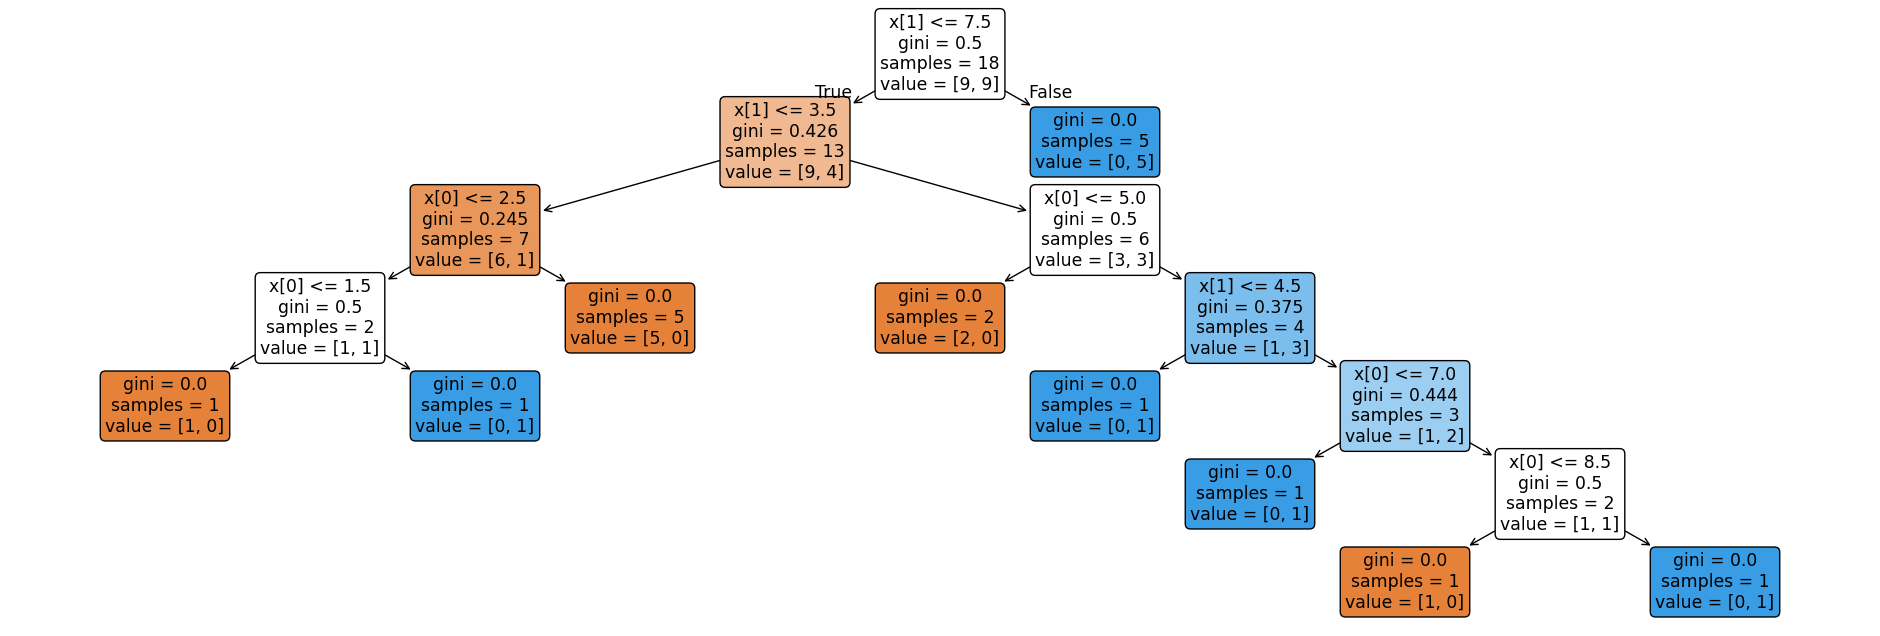

In [6]:
# Визуализация дерева решений
plt.figure(figsize=(24, 8))  # Увеличиваем размер изображения
tree.plot_tree(decision_tree_classifier, rounded=True, filled=True)
plt.show()

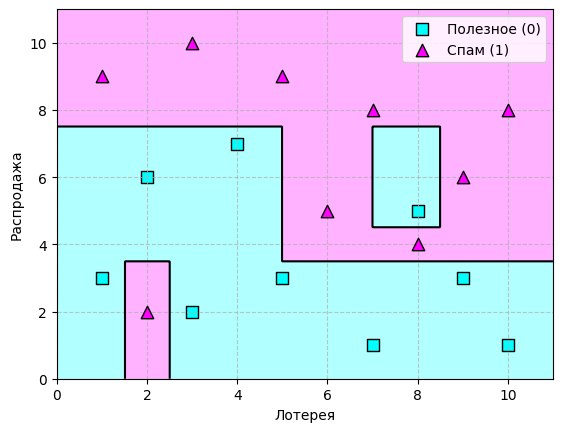

In [7]:
# Визуализация границы решения классификатора
plot_decision_boundary(features, labels, decision_tree_classifier, class_names=class_names, xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim)
plt.show()

# Ручное создание ансамбля (аналог Random Forest)

In [8]:
# Определяем диапазоны индексов для каждого батча
batches = [
    range(0, 6),    # Первый батч: индексы 0-5
    range(6, 12),   # Второй батч: индексы 6-11
    range(12, 18)   # Третий батч: индексы 12-17
]

# Заголовки для каждого подграфика
titles = ['First Batch (0-5)', 
          'Second Batch (6-11)', 
          'Third Batch (12-17)']

features_split = []
labels_split = []

# Цикл по всем батчам
for i, (batch_range) in enumerate(batches):
    # Выбираем данные для текущего батча
    batch_data = spam_dataset.loc[batch_range]
    features_split.append(batch_data[['Lottery', 'Sale']])
    labels_split.append(batch_data['Spam'])

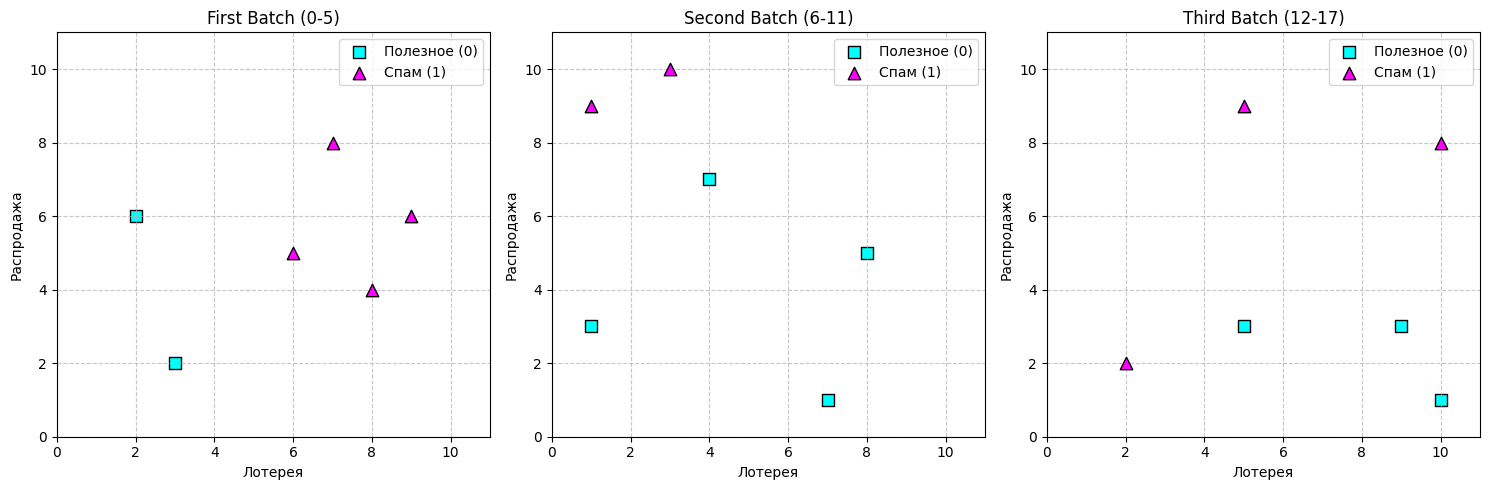

In [9]:
x_min, x_max = features['Lottery'].min() - 2, features['Lottery'].max() + 2
y_min, y_max = features['Sale'].min() - 2, features['Sale'].max() + 2

# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, (batch_range, title, features_one, labels_one) in enumerate(zip(batches, titles, features_split, labels_split)):

    # Отображаем точки на текущем подграфике
    plot_points(features_one, labels_one, class_names=class_names, xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim, ax=axes[i])  # Передаем конкретную ось для отрисовки
    
    axes[i].set_title(title)  # Устанавливаем заголовок
    
plt.tight_layout()  # Автоматическая настройка отступов между графиками
plt.show()  # Показываем все графики

In [10]:
dt_models = []
scores = []

# Цикл по всем батчам
for i, (features_one, labels_one) in enumerate(zip(features_split, labels_split)):

    dt = DecisionTreeClassifier(random_state=0, max_depth=1)
    dt.fit(features_one, labels_one)
    
    dt_models.append(dt)
    scores.append(dt.score(features_one, labels_one))

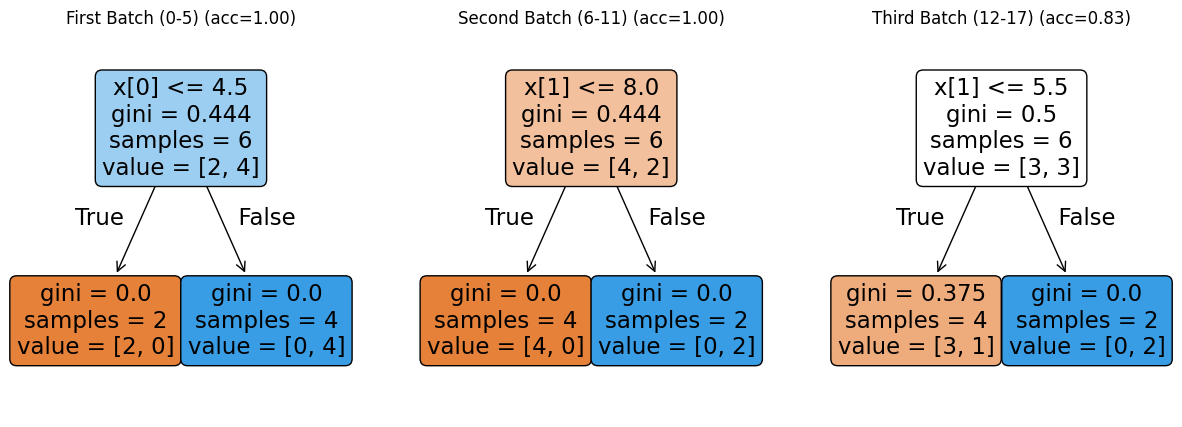

In [11]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, (title, dt_model, score) in enumerate(zip(titles, dt_models, scores)):
    # Визуализация дерева решений
    tree.plot_tree(dt_model, rounded=True, filled=True, ax=axes[i])
    
    axes[i].set_title(f'{title} (acc={score:.2f})')  # Устанавливаем заголовок
    
plt.show()

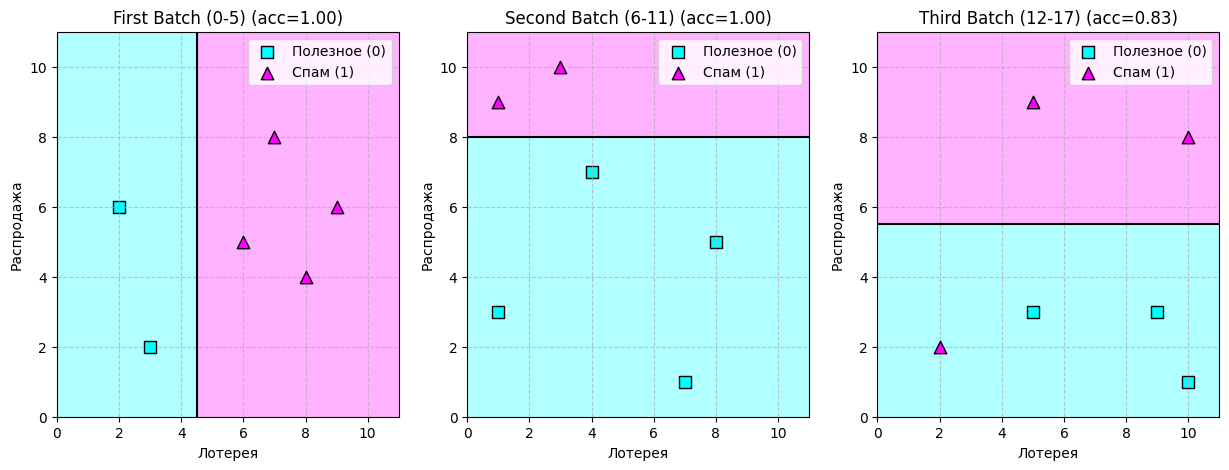

In [12]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, (title, features_one, labels_one, dt_model, score) in enumerate(zip(titles, features_split, labels_split, dt_models, scores)):
    
    # Визуализация границы решения классификатора
    plot_decision_boundary(features_one, labels_one, dt_model, class_names=class_names, xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim, ax=axes[i])
    
    axes[i].set_title(f'{title} (acc={score:.2f})')  # Устанавливаем заголовок
    
plt.show()

In [13]:
def majority_vote_predict(models, X):
        """
        Делает прогноз для объектов X на основе голосования нескольких моделей.
        
        models: список обученных классификаторов
        X: DataFrame или np.ndarray с признаками
        
        return: np.ndarray с финальными прогнозами
        """
        # Получаем прогнозы каждой модели -> матрица shape=(n_models, n_samples)
        predictions = np.array([model.predict(X) for model in models])
        
        # Преобразуем: транспонируем, чтобы получить (n_samples, n_models)
        predictions = predictions.T
        
        # Для каждого объекта выбираем наиболее частый класс (0 или 1)
        final_predictions = []
        
        for row in predictions:
            counts = np.bincount(row)  # считаем сколько 0 и 1
            final_predictions.append(np.argmax(counts))  # выбираем класс с макс. частотой
        
        return np.array(final_predictions)
    

class EnsembleClassifier:
    def __init__(self, models):
        self.models = models
        
    def predict(self, X):
        return majority_vote_predict(self.models, X)

Accuracy ансамбля: 0.83


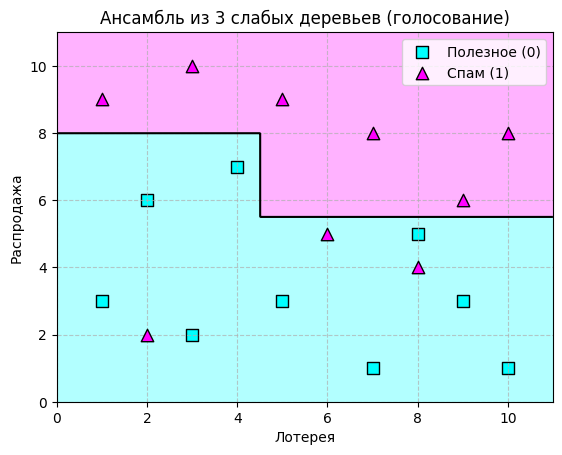

In [14]:
# Применяем ансамбль
y_pred_ensemble = majority_vote_predict(dt_models, features)

# Оценим точность
print(f"Accuracy ансамбля: {accuracy_score(labels, y_pred_ensemble):.2f}")

# Создаём ансамбль
ensemble_clf = EnsembleClassifier(dt_models)

# Рисуем границу решений ансамбля
plot_decision_boundary(features, labels, ensemble_clf, class_names=class_names, xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim)
plt.title("Ансамбль из 3 слабых деревьев (голосование)")
plt.show()

# Обучение Random Forest в Scikit-Learn

In [15]:
random_forest_classifier = RandomForestClassifier(random_state=0, n_estimators=5, max_depth=1)
random_forest_classifier.fit(features, labels)

,n_estimators,5
,criterion,'gini'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
random_forest_classifier.score(features, labels)

0.8333333333333334

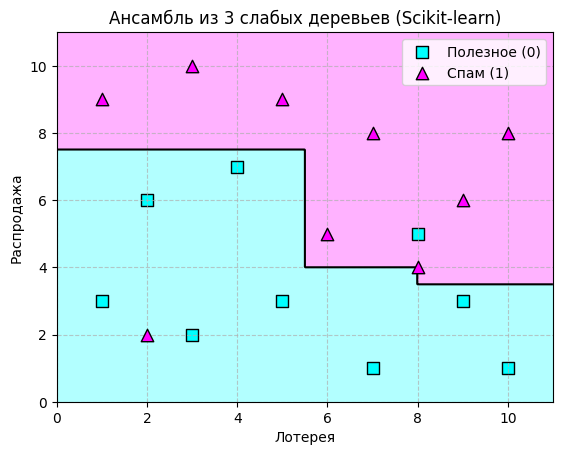

In [17]:
plot_decision_boundary(features, labels, 
                       random_forest_classifier, 
                       class_names=class_names, 
                       xlabel=xlabel, 
                       ylabel=ylabel, 
                       xlim=xlim, 
                       ylim=ylim)
plt.title("Ансамбль из 3 слабых деревьев (Scikit-learn)")
plt.show()

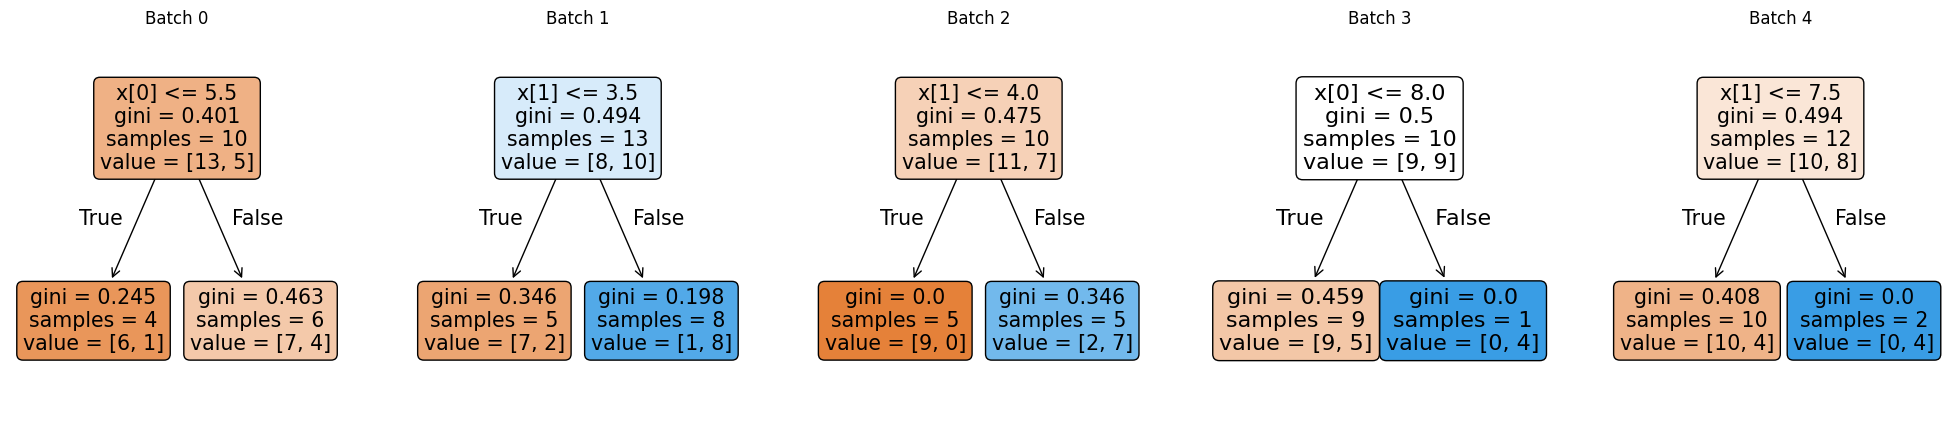

In [18]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, dt_model in enumerate(random_forest_classifier.estimators_):
    # Визуализация дерева решений
    tree.plot_tree(dt_model, rounded=True, filled=True, ax=axes[i])
    axes[i].set_title(f'Batch {i}')  # Устанавливаем заголовок
    
plt.show()

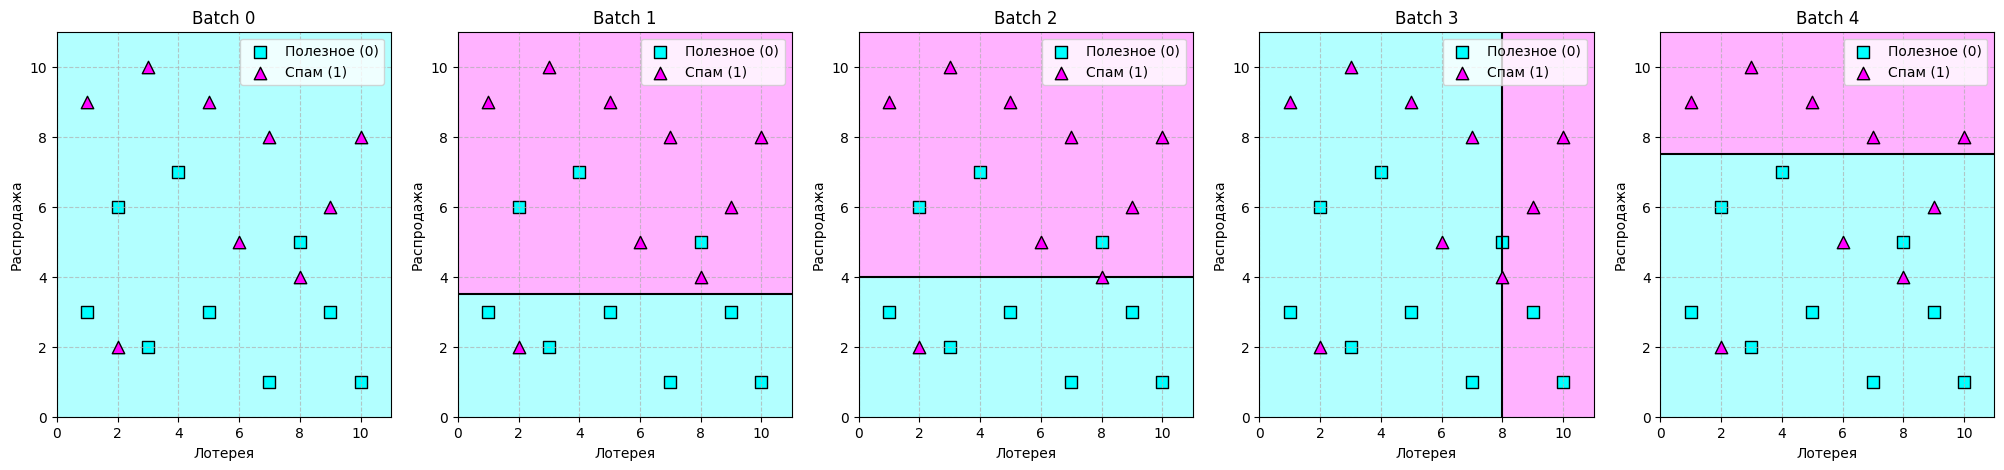

In [19]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, dt_model in enumerate(random_forest_classifier.estimators_):
    # Визуализация границы решения классификатора
    plot_decision_boundary(features, labels, dt_model, class_names=class_names, xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim, ax=axes[i])
    
    axes[i].set_title(f'Batch {i}')  # Устанавливаем заголовок
    
plt.show()

# AdaBoost. Разумное объединение слабых алгоритмов для формирования сильного

In [20]:
adaboost_classifier = AdaBoostClassifier(random_state=0, n_estimators=6)
adaboost_classifier.fit(features, labels)

,estimator,None
,n_estimators,6
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,0


In [21]:
adaboost_classifier.score(features, labels)

0.7777777777777778

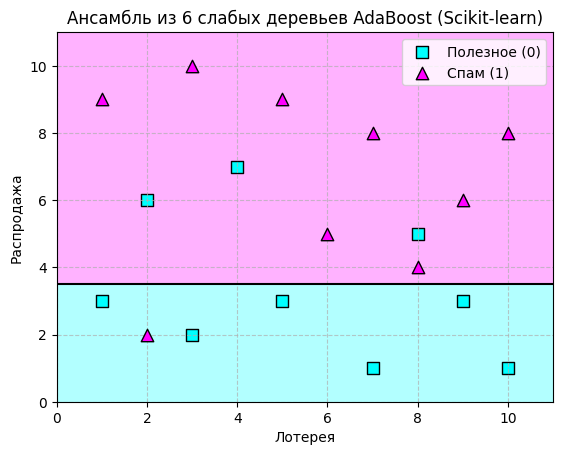

In [22]:
plot_decision_boundary(features, labels, 
                       adaboost_classifier, 
                       class_names=class_names, 
                       xlabel=xlabel, 
                       ylabel=ylabel, 
                       xlim=xlim, 
                       ylim=ylim)
plt.title("Ансамбль из 6 слабых деревьев AdaBoost (Scikit-learn)")
plt.show()

In [23]:
adaboost_classifier.estimator_weights_

array([1.25276297, 1.19625076, 0.73639716, 0.67741931, 0.33053568,
       0.44590681])

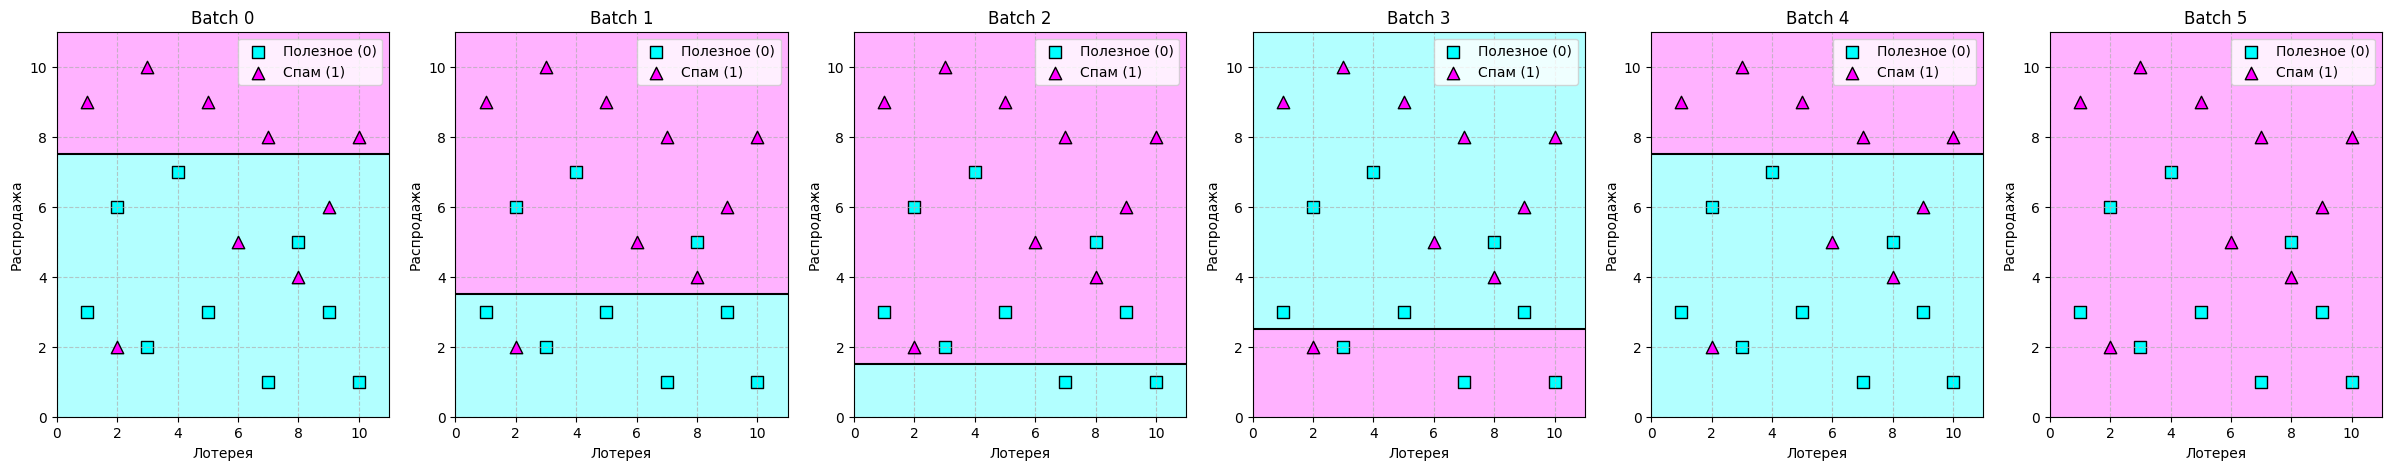

In [24]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 6, figsize=(30, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, dt_model in enumerate(adaboost_classifier.estimators_):
    # Визуализация границы решения классификатора
    plot_decision_boundary(features, labels, dt_model, class_names=class_names, xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim, ax=axes[i])
    
    axes[i].set_title(f'Batch {i}')  # Устанавливаем заголовок
    
plt.show()

# Градиентный бустинг. Использование деревьев решений для формирования сильных обучающих алгоритмов

In [25]:
gradient_boosting_classifier = GradientBoostingClassifier(random_state=0, n_estimators=5)
gradient_boosting_classifier.fit(features, labels)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,5
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [26]:
gradient_boosting_classifier.score(features, labels)

0.8888888888888888

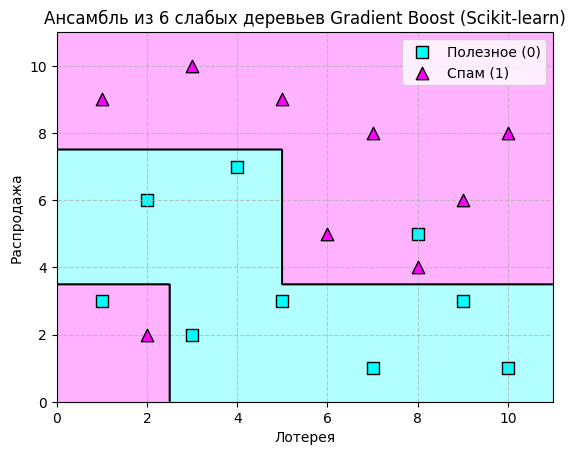

In [27]:
plot_decision_boundary(features, labels, 
                       gradient_boosting_classifier, 
                       class_names=class_names, 
                       xlabel=xlabel, 
                       ylabel=ylabel, 
                       xlim=xlim, 
                       ylim=ylim)
plt.title("Ансамбль из 6 слабых деревьев Gradient Boost (Scikit-learn)")
plt.show()

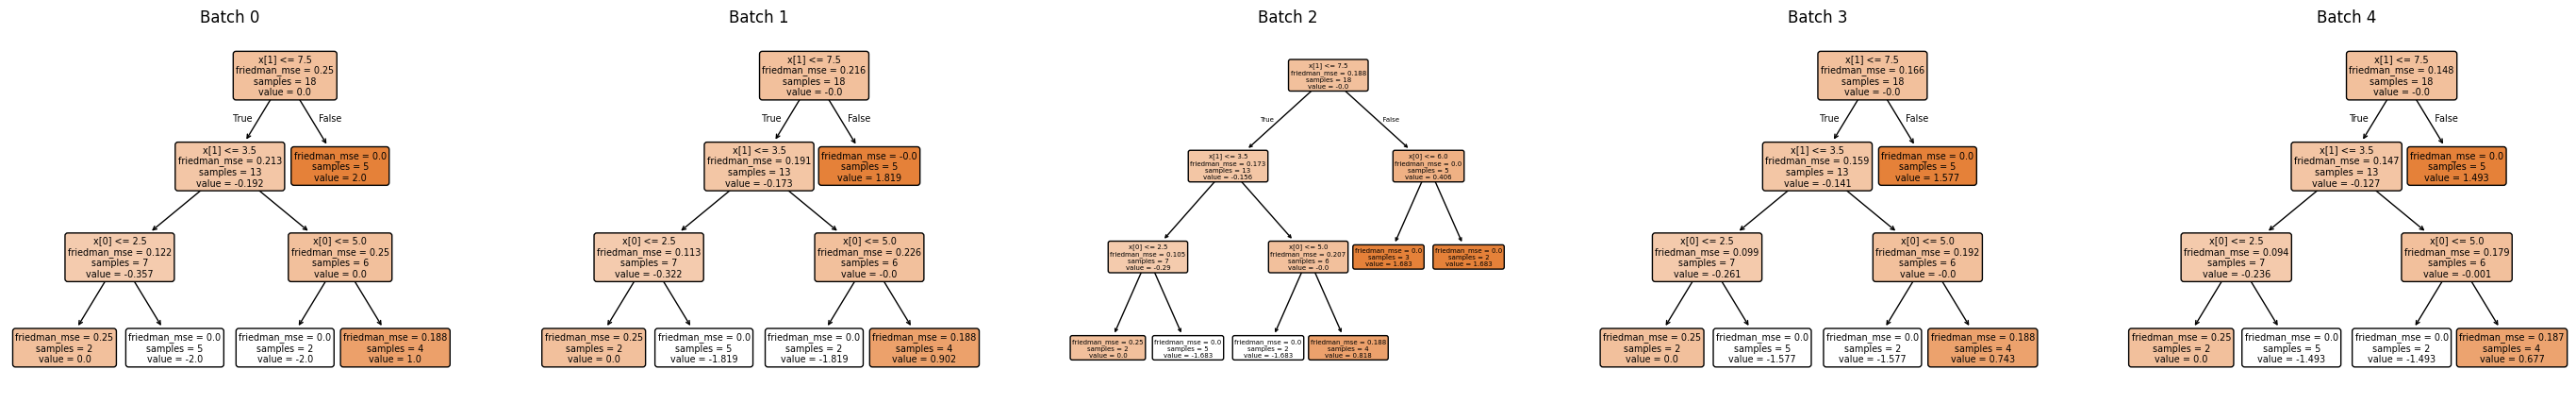

In [28]:
# Создаем фигуру с 5 подграфиками в одной строке
fig, axes = plt.subplots(1, 5, figsize=(35, 5))  # 1 строка, 5 столбцов, размер 35x5 дюймов

for i, dt_model in enumerate(gradient_boosting_classifier.estimators_):
    # Визуализация дерева решений
    tree.plot_tree(dt_model[0], rounded=True, filled=True, ax=axes[i])
    axes[i].set_title(f'Batch {i}')  # Устанавливаем заголовок
    
plt.show()

# XGBoost — экстремальный метод градиентного бустинга

In [29]:
xgboost_classifier = XGBClassifier(random_state=0, n_estimators=5)
xgboost_classifier.fit(np.array(features), labels)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [30]:
xgboost_classifier.score(np.array(features), labels)

0.8888888888888888

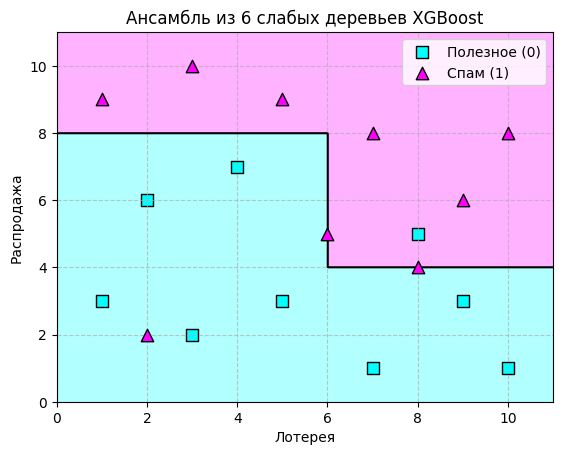

In [31]:
plot_decision_boundary(features, labels, 
                       xgboost_classifier, 
                       class_names=class_names, 
                       xlabel=xlabel, 
                       ylabel=ylabel, 
                       xlim=xlim, 
                       ylim=ylim)
plt.title("Ансамбль из 6 слабых деревьев XGBoost")
plt.show()